In [549]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
clrs = ['darkorange', 'gold', 'green', 'lightskyblue','salmon','turquoise','pink','bisque']
palette=sns.set_style("whitegrid")

# Reading input files

In [417]:
def read_input():
    crimes_df = pd.read_pickle("Cleaned_Crimes_dataframe.pkl")
    census_df = pd.read_pickle("Cleaned_Census_dataframe.pkl")
    return crimes_df,census_df

In [616]:
crimes_df,census_df=read_input()
crimes_df

,block,primarytype,locationdescription,arrest,domestic,district,ward,communityarea,year,latitude,longitude
date,,,,,,,,,,,
2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,RESIDENCE,False,True,9.0,12.0,61.0,2015,41.815117,-87.670000
2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,CTA BUS,False,False,15.0,29.0,25.0,2015,41.895080,-87.765400
2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,SIDEWALK,True,False,14.0,35.0,21.0,2015,41.937406,-87.716650
2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,APARTMENT,False,True,15.0,28.0,25.0,2015,41.881903,-87.755121
2015-09-05 10:55:00,082XX S LOOMIS BLVD,BURGLARY,RESIDENCE,False,False,6.0,21.0,71.0,2015,41.744379,-87.658431
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22 13:00:00,080XX S MERRILL AVE,DECEPTIVE PRACTICE,RESIDENCE,False,False,4.0,8.0,46.0,2021,41.749046,-87.572278
2021-03-22 22:05:00,016XX S HOMAN AVE,BATTERY,APARTMENT,False,True,10.0,24.0,29.0,2021,41.858066,-87.710306
2021-03-22 21:00:00,010XX W 70TH ST,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,True,7.0,6.0,68.0,2021,41.766923,-87.651024


In [419]:
crimes_df_date = pd.Series(crimes_df.index)
crimes_df_date = pd.to_datetime(crimes_df_date)
crimes_df['day'] = list(crimes_df_date.dt.day_name())
crimes_df['month'] = list(crimes_df_date.dt.month_name())
crimes_df['hour'] = list(crimes_df_date.dt.hour)

In [420]:
def create_mappings(mapping_dict,dataFrame,attribute):
    mapping_cols={}
    for parent_category, child in mapping_dict.items():
        for key in parent_category:
            mapping_cols[key] = child

    dataFrame[attribute] = dataFrame[attribute].map(mapping_cols)
    return dataFrame

In [421]:

grouped_crime_dict = {}
crimes_dict = {  
    ('CRIMINAL TRESPASS','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','HOMICIDE') : 'CRIMINAL CHARGE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN TRAFFICKING',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTICS',
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL CHARGE',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION','ASSAULT') : 'SEXUAL OFFENSE CHARGE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS OFFENSE CHARGE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER CHARGE'
}
#crimes_df=create_mappings(crimes_dict,crimes_df,"grouped_crime_type")

for groups, value in crimes_dict.items():
    for key in groups:
        grouped_crime_dict[key] = value
crimes_df['grouped_crime_type'] = crimes_df.primarytype.map(grouped_crime_dict)

In [422]:
grouped_loc_dict={}
loc_dict = {
    ('RESIDENCE', 'APARTMENT', 'CHA APARTMENT', 'RESIDENCE PORCH/HALLWAY', \
     'RESIDENCE-GARAGE','RESIDENTIAL YARD (FRONT/BACK)', \
     'DRIVEWAY - RESIDENTIAL', 'HOUSE','RESIDENCE - YARD (FRONT / BACK)',\
     'RESIDENCE - GARAGE','ROOMING HOUSE','ELEVATOR', 'NURSING HOME', 'NURSING / RETIREMENT HOME',\
     'HOTEL','RESIDENCE - PORCH / HALLWAY','MOTEL','COLLEGE / UNIVERSITY - RESIDENCE HALL',\
     'POOLROOM','HOTEL / MOTEL','PORCH','POOL ROOM') : 'RESIDENTIAL AREA',
    
    ('BARBERSHOP', 'COMMERCIAL / BUSINESS OFFICE', 'CURRENCY EXCHANGE', \
     'DEPARTMENT STORE', 'RESTAURANT','ATHLETIC CLUB', 'TAVERN/LIQUOR STORE', \
     'SMALL RETAIL STORE', 'HOTEL/MOTEL', 'GAS STATION','AUTO / BOAT / RV DEALERSHIP', \
     'CONVENIENCE STORE', 'BANK', 'BAR OR TAVERN', 'DRUG STORE',\
     'GROCERY FOOD STORE', 'CAR WASH', 'SPORTS ARENA/STADIUM', 'DAY CARE CENTER',\
     'MOVIE HOUSE/THEATER','APPLIANCE STORE', 'CLEANING STORE', 'PAWN SHOP', \
     'FACTORY/MANUFACTURING BUILDING', 'ANIMAL HOSPITAL','BOWLING ALLEY', \
     'SAVINGS AND LOAN', 'CREDIT UNION', 'KENNEL', 'GARAGE/AUTO REPAIR', \
     'LIQUOR STORE','GAS STATION DRIVE/PROP.', 'OFFICE', 'BARBER SHOP/BEAUTY SALON','FUNERAL PARLOR',\
     'SCHOOL - PRIVATE GROUNDS','CTA PARKING LOT / GARAGE / OTHER PROPERTY','CLEANERS/LAUNDROMAT'\
     'HOSPITAL BUILDING / GROUNDS', 'PUBLIC HIGH SCHOOL' ,'FACTORY / MANUFACTURING BUILDING', \
     'FACTORY', 'SCHOOL - PRIVATE BUILDING', 'RETAIL STORE','CLUB','TAVERN / LIQUOR STORE',\
     'MEDICAL / DENTAL OFFICE', 'MOVIE HOUSE / THEATER') : 'BUSINESS AREA',
    
    ('VEHICLE NON-COMMERCIAL', 'AUTO', 'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)', \
     'TAXICAB','VEHICLE-COMMERCIAL', 'VEHICLE - DELIVERY TRUCK', \
     'VEHICLE-COMMERCIAL - TROLLEY BUS','VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',\
     'VEHICLE - COMMERCIAL','VEHICLE - OTHER RIDE SERVICE','DELIVERY TRUCK',\
     'TAXI CAB', 'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',\
     'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS', 'TRUCK','TRAILER') : 'VEHICLE',
    
    ('HOSPITAL BUILDING/GROUNDS', 'NURSING HOME/RETIREMENT HOME', \
     'SCHOOL, PUBLIC, BUILDING','CHURCH/SYNAGOGUE/PLACE OF WORSHIP', \
     'SCHOOL, PUBLIC, GROUNDS', 'SCHOOL, PRIVATE, BUILDING',\
     'MEDICAL/DENTAL OFFICE', 'LIBRARY', 'COLLEGE/UNIVERSITY RESIDENCE HALL', \
     'YMCA', 'HOSPITAL','SCHOOL - PUBLIC BUILDING','COLLEGE / UNIVERSITY - GROUNDS',\
     'EXPRESSWAY EMBANKMENT', 'SCHOOL - PRIVATE GROUNDS','RAILROAD PROPERTY',\
     'COACH HOUSE','CHURCH') : 'PUBLIC BUILDINGS',
    
    ('STREET', 'PARKING LOT/GARAGE(NON.RESID.)', 'SIDEWALK', 'PARK PROPERTY', \
     'ALLEY', 'CEMETARY','CHA HALLWAY/STAIRWELL/ELEVATOR', 'CHA PARKING LOT/GROUNDS', \
     'COLLEGE/UNIVERSITY GROUNDS', 'BRIDGE','SCHOOL, PRIVATE, GROUNDS', \
     'FOREST PRESERVE', 'LAKEFRONT/WATERFRONT/RIVERBANK', 'PARKING LOT', 'DRIVEWAY',\
     'HALLWAY', 'YARD', 'CHA GROUNDS', 'RIVER BANK', 'STAIRWELL', 'CHA PARKING LOT',\
     'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA','OTHER RAILROAD PROP / TRAIN DEPOT',\
     'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA', 'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',\
     'AIRPORT BUILDING NON-TERMINAL - SECURE AREA', 'AIRPORT EXTERIOR - NON-SECURE AREA',\
     'AIRPORT PARKING LOT', 'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',\
     'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA', 'AIRPORT VENDING ESTABLISHMENT',\
     'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA','CTA PROPERTY','CTA "L" PLATFORM',\
     'VACANT LOT', 'VACANT LOT / LAND','VACANT LOT/LAND', 'LAGOON','HIGHWAY / EXPRESSWAY','SEWER',\
     'LIVERY STAND OFFICE','SCHOOL YARD','SCHOOL - PUBLIC GROUNDS',\
     'PUBLIC GRAMMAR SCHOOL', 'SPORTS ARENA / STADIUM', 'CHA BREEZEWAY', 'DUMPSTER',\
     'CHA PARKING LOT / GROUNDS','RIVER', 'JUNK YARD/GARBAGE DUMP', \
     'PARKING LOT / GARAGE (NON RESIDENTIAL)','TAVERN', 'VESTIBULE', 'TRUCKING TERMINAL',\
     'CHURCH / SYNAGOGUE / PLACE OF WORSHIP', 'CHURCH PROPERTY', \
     'LAKE','LAKEFRONT / WATERFRONT / RIVERBANK','HIGHWAY/EXPRESSWAY') : 'PUBLIC AREA',
    
    ('POLICE FACILITY/VEH PARKING LOT', 'GOVERNMENT BUILDING/PROPERTY', \
     'FEDERAL BUILDING', 'JAIL / LOCK-UP FACILITY','FIRE STATION', \
     'GOVERNMENT BUILDING','CHA ELEVATOR','GOVERNMENT BUILDING / PROPERTY',\
     'OTHER RAILROAD PROPERTY / TRAIN DEPOT','COUNTY JAIL', 'CHA STAIRWELL',\
     'POLICE FACILITY / VEHICLE PARKING LOT','CHA PLAY LOT','CHA LOBBY',\
     'CHA HALLWAY') : 'GOVERNMENT LOCATONS',
    
    ('AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA', 'CTA PLATFORM', \
     'CTA STATION', 'CTA BUS STOP', 'CTA TRAIN', 'CTA BUS', 'CTA GARAGE / OTHER PROPERTY',\
     'AIRCRAFT', 'OTHER COMMERCIAL TRANSPORTATION', \
     'AIRPORT EXTERIOR - SECURE AREA', 'AIRPORT TRANSPORTATION SYSTEM (ATS)','CTA TRACKS - RIGHT OF WAY', \
     'AIRPORT/AIRCRAFT', 'BOAT/WATERCRAFT','CTA "L" TRAIN','PRAIRIE','CHA HALLWAY / STAIRWELL / ELEVATOR') : 'PUBLIC TRANSPORT',
    
    ('OTHER', 'ABANDONED BUILDING', 'WAREHOUSE', 'ATM (AUTOMATIC TELLER MACHINE)',\
     'CONSTRUCTION SITE', 'NEWSSTAND','COIN OPERATED MACHINE',\
     'HORSE STABLE','FARM', 'GARAGE', 'WOODED AREA', 'GANGWAY', 'BASEMENT',\
     'OTHER (SPECIFY)') : 'OTHER'  
}


for groups, value in loc_dict.items():
    for key in groups:
        grouped_loc_dict[key] = value
crimes_df['grouped_crime_location'] = crimes_df.locationdescription.map(grouped_loc_dict)

In [423]:
crimes_df["arrest"] = crimes_df["arrest"].astype(int)
crimes_df["domestic"] = crimes_df["domestic"] .astype(int)

# Visualisations

## 1. Percentage of different crimes 

<ipython-input-582-96f1fb7c6ecc>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


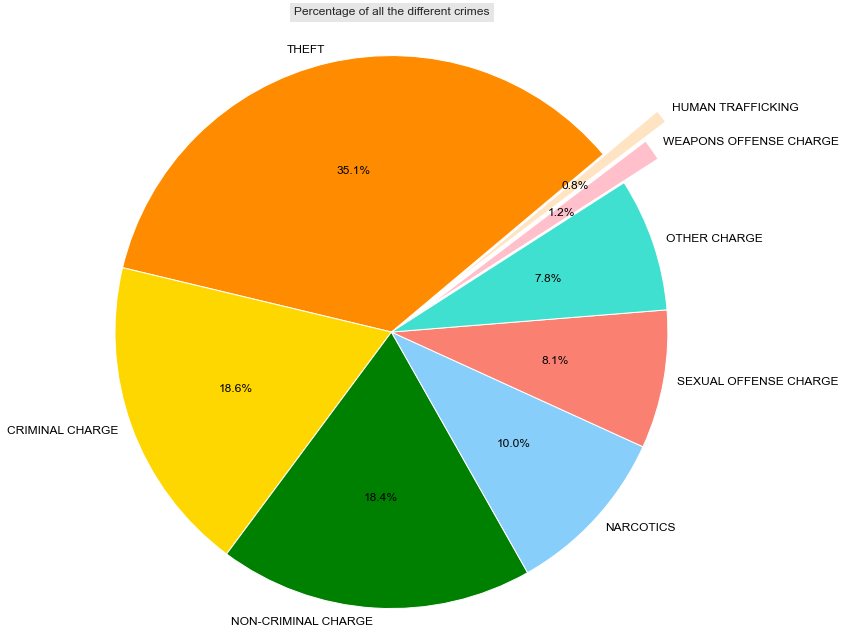

In [582]:
data=crimes_df['grouped_crime_type'].value_counts()
values=data.index
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
txt_prp={'color':"black",'size': 'large'}
exp=(0, 0, 0, 0,0,0.0,0.3,0.5)
ax.pie(data, labels=data.index, colors=clrs ,explode = exp  ,autopct='%1.1f%%',  \
        labeldistance=1.05,radius=2, startangle=40,textprops=txt_prp)
plt.title("Percentage of all the different crimes", bbox={'facecolor':'0.9', 'pad':5},y=1.4)
fig.show()

## 2. Percentage of crime at different locations

<ipython-input-581-1c51421e1eba>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


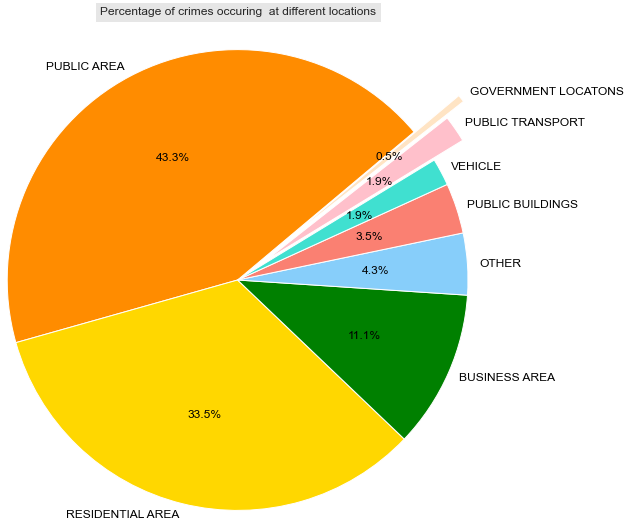

In [581]:
data=crimes_df['grouped_crime_location'].value_counts()
values=data.index
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
txt_prp={'color':"black",'size': 'large'}
exp=(0, 0, 0, 0,0,0.0,0.3,0.5)
plt.title("Percentage of crimes occuring  at different locations", bbox={'facecolor':'0.9', 'pad':5},y=1.4)
ax.pie(data, labels=values, colors=clrs ,explode = exp  ,autopct='%1.1f%%',  \
        labeldistance=1.05,radius=2, startangle=40,textprops=txt_prp)

fig.show()

## 3.Types of crimes occuring at different locations

<ipython-input-601-5fa28d4896b4>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


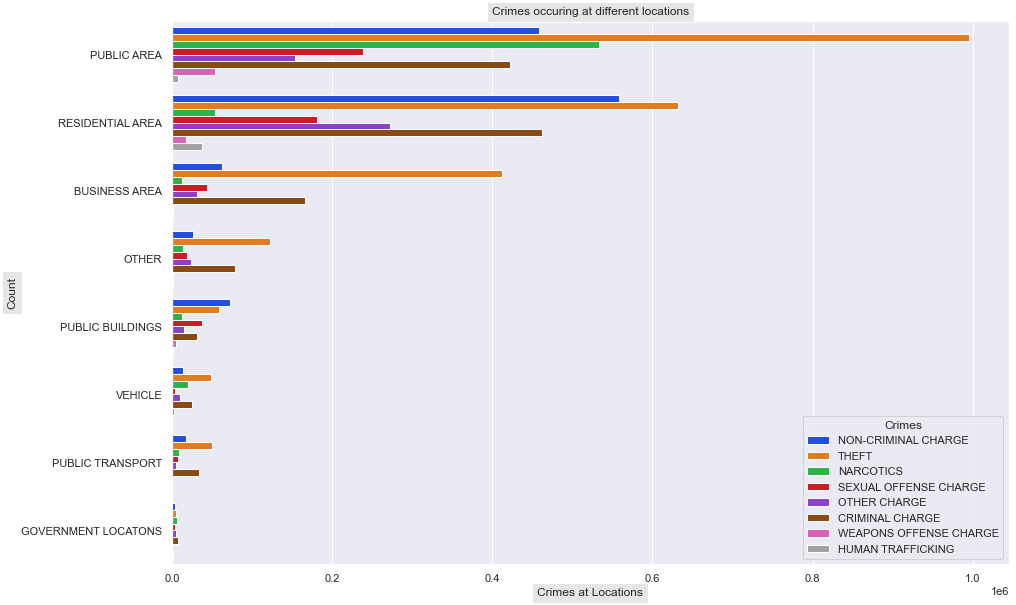

In [601]:
fig=plt.figure(figsize = (15, 10))
count=crimes_df['grouped_crime_location'].value_counts()
sns.set_theme(style="darkgrid")
sns.countplot(y ='grouped_crime_location',\
                   data = crimes_df,\
                   order = count.iloc[:10].index,\
                   hue='grouped_crime_type',\
                   palette="bright")

plt.legend(title='Crimes', loc='lower right')
plt.xlabel("Crimes at Locations",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Count",bbox={'facecolor':'0.9', 'pad':5})
plt.title("Crimes occuring at different locations",bbox={'facecolor':'0.9', 'pad':5},y=1.0)
fig.show()

In [ ]:
'''#69d' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r',
'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 
'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r',
'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu',
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 
'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 
'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 
'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r'
, 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r'
, 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r',
'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 
'vlag', 'vlag_r', 'winter', 'winter_r''''

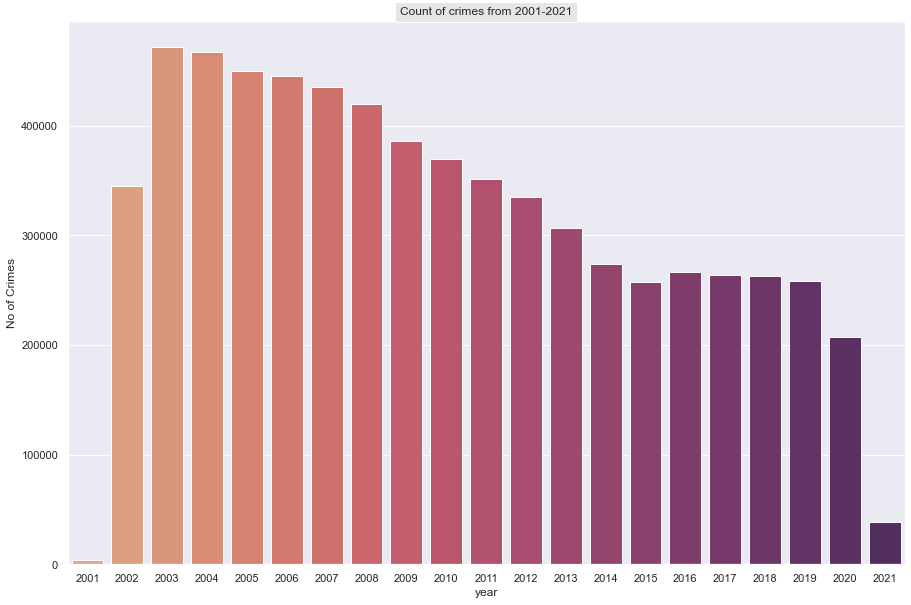

In [669]:
fig=plt.figure(figsize = (15, 10))
plot=sns.countplot(x='year',data=crimes_df,palette="flare")
plt.ylabel('No of Crimes')
plt.title("Count of crimes from 2001-2021",bbox={'facecolor':'0.9', 'pad':5},y=1.0)
plt.show()

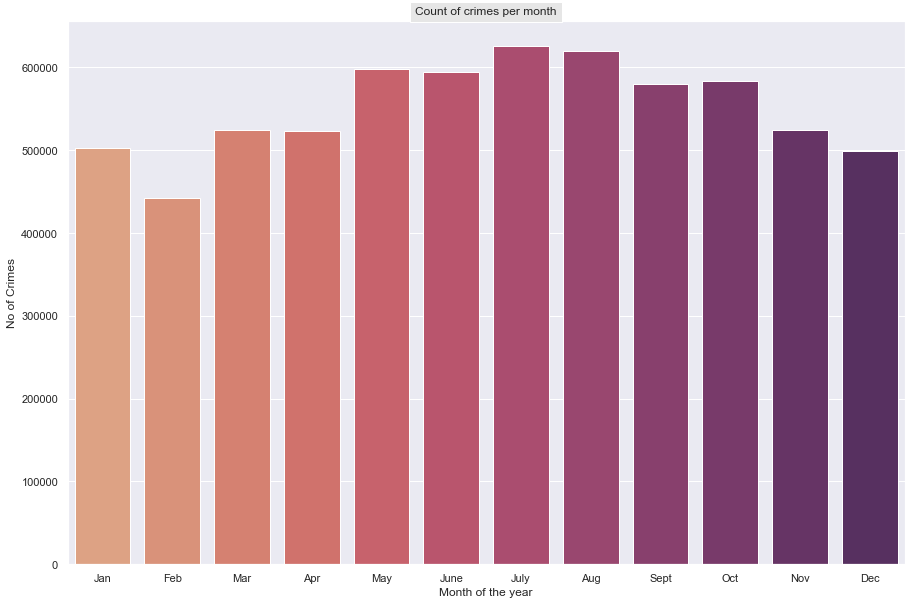

In [670]:
fig=plt.figure(figsize = (15, 10))
plot=sns.countplot(x=crimes_df.index.month,data=crimes_df,palette="flare")
month=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
plot.set_xticklabels(month)
plt.ylabel('No of Crimes')
plt.xlabel('Month of the year')
plt.title("Count of crimes per month",bbox={'facecolor':'0.9', 'pad':5},y=1.0)
plt.show()

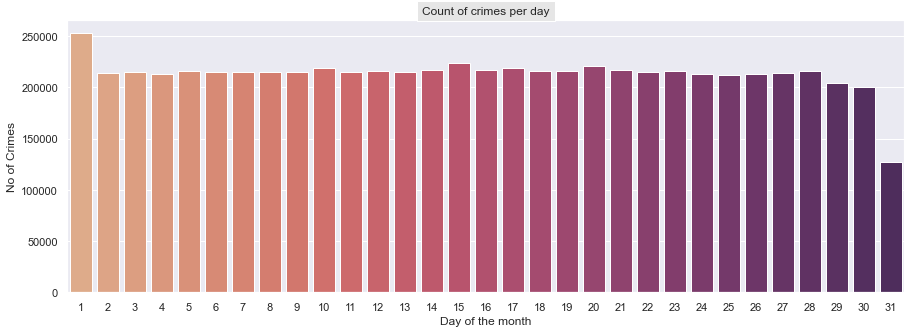

In [671]:
fig=plt.figure(figsize = (15, 5))
plot=sns.countplot(x=crimes_df.index.day, data=crimes_df, palette="flare")
plt.ylabel('No of Crimes')
plt.xlabel('Day of the month')
plt.title("Count of crimes per day",bbox={'facecolor':'0.9', 'pad':5},y=1.0)
plt.show()

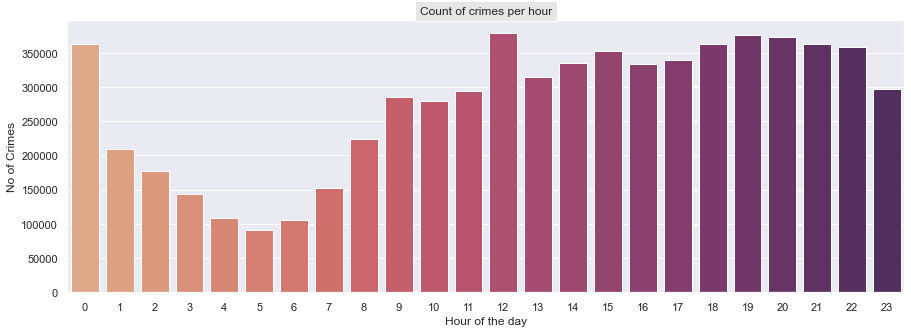

In [672]:
fig=plt.figure(figsize = (15, 5))
plot=sns.countplot(x=crimes_df.index.hour, data=crimes_df, palette="flare")
plt.ylabel('No of Crimes')
plt.xlabel('Hour of the day')
plt.title("Count of crimes per hour",bbox={'facecolor':'0.9', 'pad':5},y=1.0)
plt.show()

## 4.Trends of Crimes in the years

In [673]:
crimes_year_df, census_year_df = read_input()

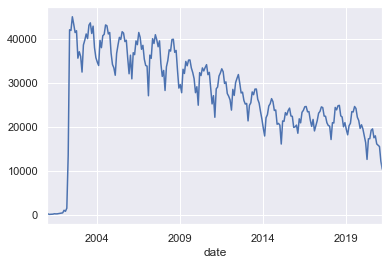

In [674]:
crimes_year_df.resample('M').size().plot()
plt.show()

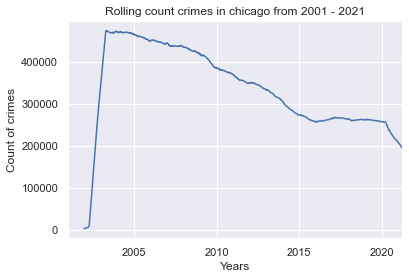

In [675]:
crimes_year_df, census_year_df = read_input()
crimes_year_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling count crimes in chicago from 2001 - 2021')
plt.ylabel('Count of crimes')
plt.xlabel('Years')
plt.show()

### Count of each crimes

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'CRIMINAL DAMAGE'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'ASSAULT'),
 Text(5, 0, 'OTHER OFFENSE'),
 Text(6, 0, 'BURGLARY'),
 Text(7, 0, 'MOTOR VEHICLE THEFT'),
 Text(8, 0, 'DECEPTIVE PRACTICE'),
 Text(9, 0, 'ROBBERY')]

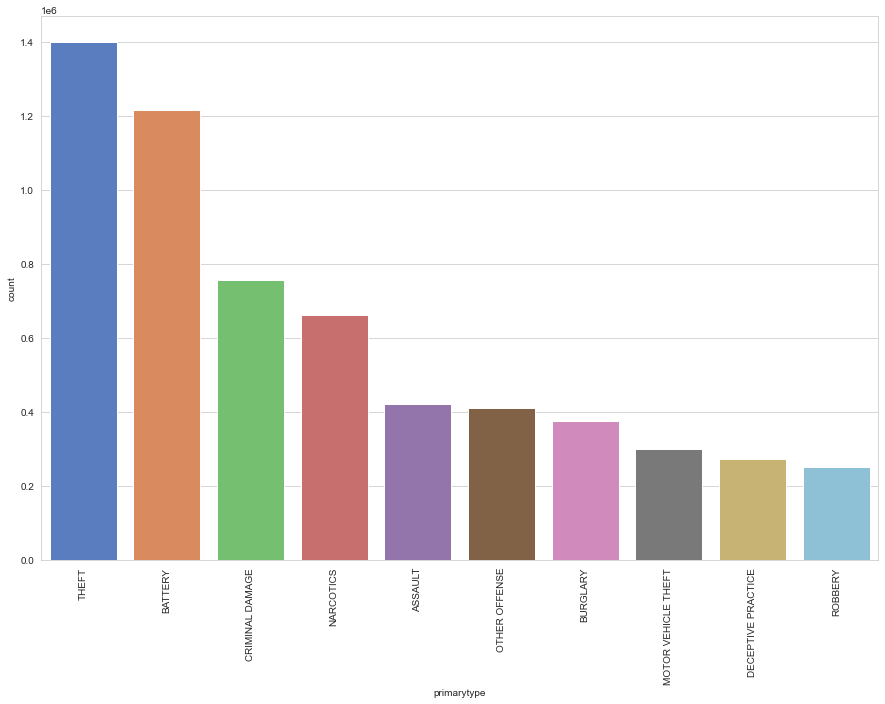

In [434]:
count = crimes_df['primarytype'].value_counts()
plt.figure(figsize = (15, 10))
sns.set_palette("muted")
plot=sns.countplot(x ='primarytype', data = crimes_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### Locations where most crimes are happening

<ipython-input-435-d86398f26cda>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0.0, 0, ''),
 Text(200000.0, 0, ''),
 Text(400000.0, 0, ''),
 Text(600000.0, 0, ''),
 Text(800000.0, 0, ''),
 Text(1000000.0, 0, ''),
 Text(1200000.0, 0, ''),
 Text(1400000.0, 0, ''),
 Text(1600000.0, 0, ''),
 Text(1800000.0, 0, '')]

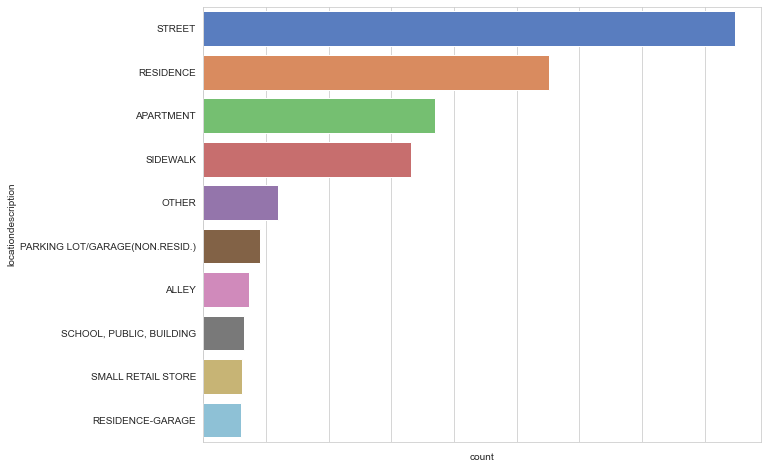

In [435]:
plt.figure(figsize = (10, 8))
sns.set_palette("muted")
count=crimes_df['locationdescription'].value_counts()
plot=sns.countplot(y ='locationdescription', data = crimes_df,order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

### 4.Trends of Crimes 

In [ ]:
sns.countplot(x='Year',data=crimes)
plt.ylabel('No of Crimes')
plt.show()

### Trends of Crimes in the years

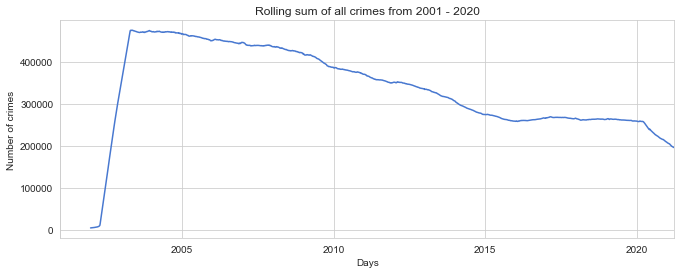

In [436]:
plt.figure(figsize=(11,4))
crimes_year_df.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2001 - 2020')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

### Trends of Crimes monthly basis

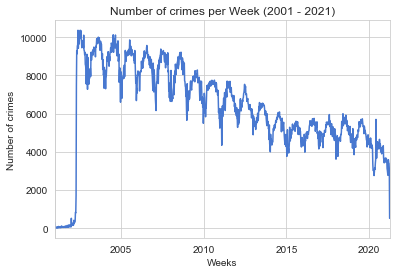

In [437]:
crimes_month_df, census_month_df=read_input()
crimes_month_df = crimes_month_df.resample('W')
crimes_month_df.size().plot(legend=False)
plt.title('Number of crimes per Week (2001 - 2021)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()

### Crimes happening monthwise

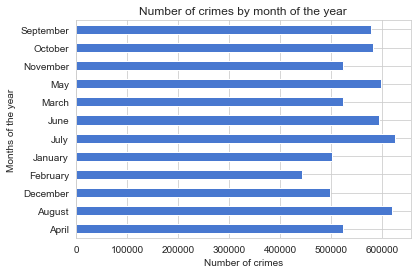

In [438]:
crimes_df.groupby([crimes_df['month']]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

### Crimes happening weekly

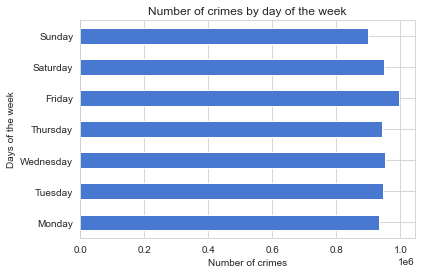

In [439]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes_df.groupby([crimes_df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

### Month Wise Crimes for Crime Locations

<Figure size 792x288 with 0 Axes>

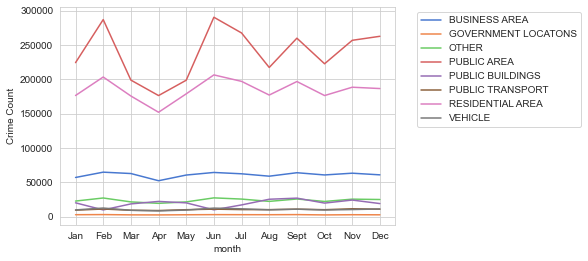

In [440]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
crime_location_month_df = crimes_df.groupby(['month', 'grouped_crime_location'])
plt.figure(figsize=(11,4))
crime_location_month_df.size().unstack().plot()
plt.ylabel('Crime Count')
plt.xticks(np.arange(12), months)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NARCOTICS'),
 Text(2, 0, 'NON-CRIMINAL CHARGE'),
 Text(3, 0, 'CRIMINAL CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'OTHER CHARGE'),
 Text(6, 0, 'WEAPONS OFFENSE CHARGE'),
 Text(7, 0, 'HUMAN TRAFFICKING')]

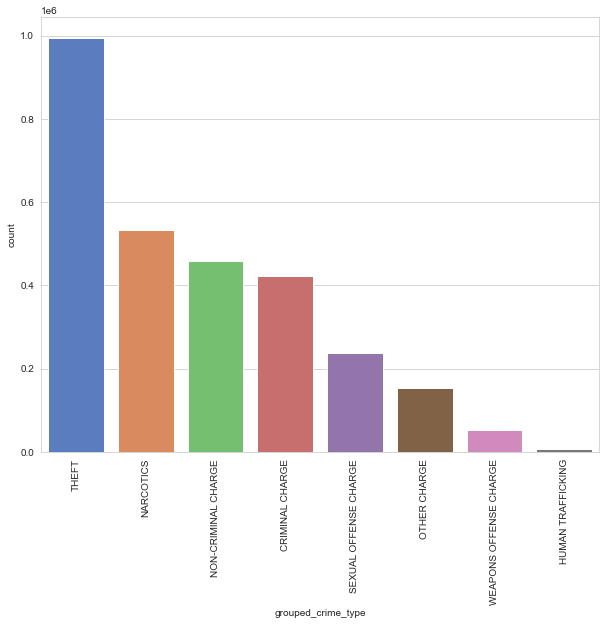

In [427]:
plt.figure(figsize = (10, 8))
publicArea_df = crimes_df[crimes_df.grouped_crime_location == 'PUBLIC AREA']
count=publicArea_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = publicArea_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in residential area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'NON-CRIMINAL CHARGE'),
 Text(2, 0, 'CRIMINAL CHARGE'),
 Text(3, 0, 'OTHER CHARGE'),
 Text(4, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'HUMAN TRAFFICKING'),
 Text(7, 0, 'WEAPONS OFFENSE CHARGE')]

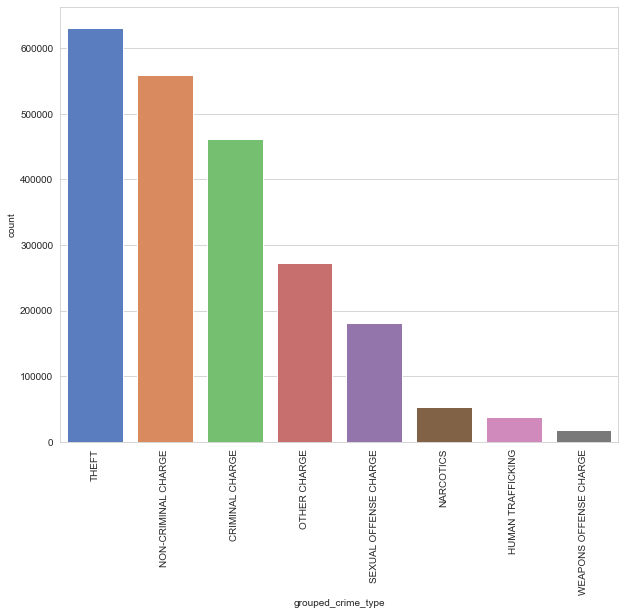

In [428]:
plt.figure(figsize = (10, 8))
residential_df = crimes_df[crimes_df.grouped_crime_location == 'RESIDENTIAL AREA']
count=residential_df['grouped_crime_type'].value_counts()
count
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = residential_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## Crimes occuring in buisness area

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'CRIMINAL CHARGE'),
 Text(2, 0, 'NON-CRIMINAL CHARGE'),
 Text(3, 0, 'SEXUAL OFFENSE CHARGE'),
 Text(4, 0, 'OTHER CHARGE'),
 Text(5, 0, 'NARCOTICS'),
 Text(6, 0, 'WEAPONS OFFENSE CHARGE'),
 Text(7, 0, 'HUMAN TRAFFICKING')]

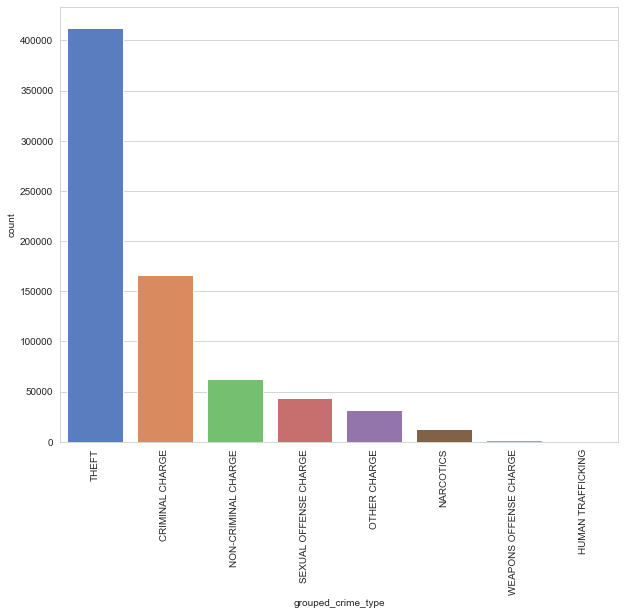

In [429]:
plt.figure(figsize = (10, 8))
bus_df = crimes_df[crimes_df.grouped_crime_location == 'BUSINESS AREA']
count=bus_df['grouped_crime_type'].value_counts()
sns.set_palette("muted")
plot=sns.countplot(x ='grouped_crime_type', data = bus_df, order = count.iloc[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

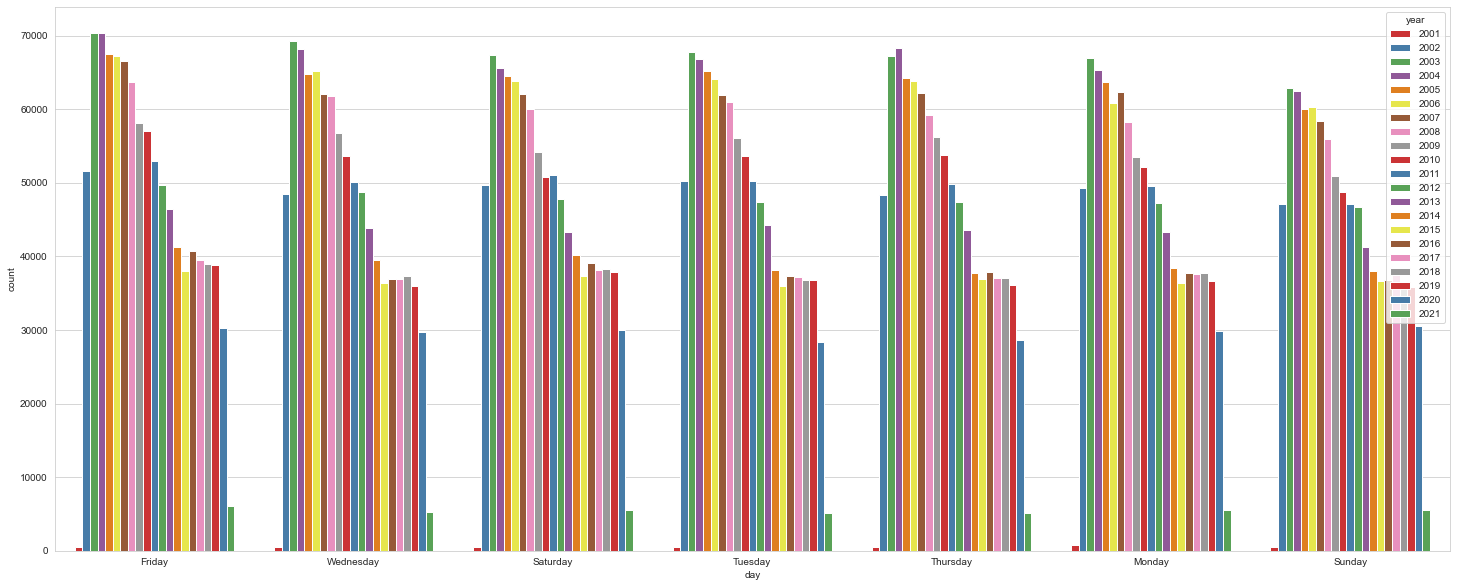

In [430]:
plt.figure(figsize=(25,10))
zone_plot = sns.countplot(data=crimes_df,x='day'
                          ,hue='year',order=crimes_df["day"].value_counts().index,palette='Set1')